In [31]:
from env import get_db_url
import numpy as np
import pandas as pd
import os
import acquire
import prepare
import wrangle
import matplotlib.pyplot as plt
from scipy import stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import explore


### As with encoded vs. unencoded data, we recommend exploring un-scaled data in your EDA process.

In [2]:
train, validate, test = prepare.split_data(wrangle.wrangle_zillow())

### Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

In [3]:
train.shape, validate.shape, test.shape

((1278128, 7), (426043, 7), (426043, 7))

In [4]:
train

,bedrooms,bathrooms,sqft,tax_value,year_built,tax_amount,fips
1844941,3.0,2.0,1520.0,420429.0,1921.0,5174.91,6037.0
824995,5.0,3.0,2935.0,391054.0,1954.0,3399.33,6037.0
1214129,4.0,4.0,3394.0,1199447.0,1958.0,13254.74,6059.0
1566096,2.0,2.0,1048.0,187230.0,1925.0,3364.40,6037.0
1259406,4.0,3.0,2843.0,193625.0,2005.0,3340.72,6037.0
...,...,...,...,...,...,...,...
2036394,3.0,3.0,2162.0,230635.0,1958.0,2928.20,6037.0
551645,5.0,3.0,3054.0,324446.0,1996.0,4652.65,6037.0
1883454,4.0,2.5,2688.0,979673.0,2000.0,10920.26,6059.0
1292898,5.0,3.0,4354.0,663628.0,1997.0,7292.88,6111.0


### Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [5]:
len(train)

1278128

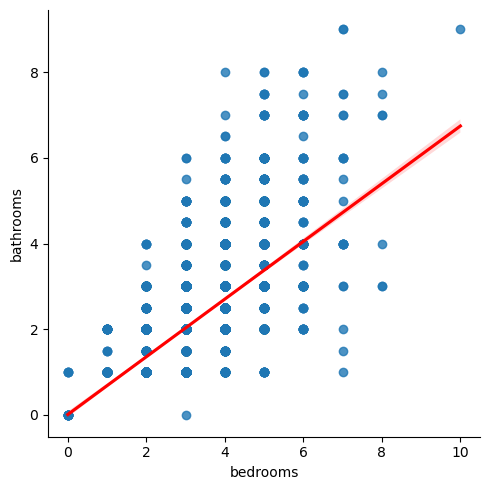

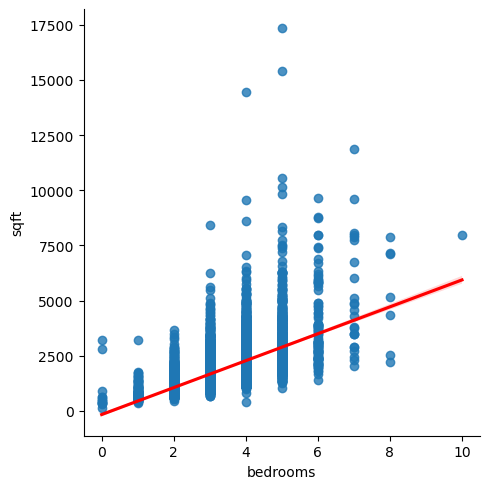

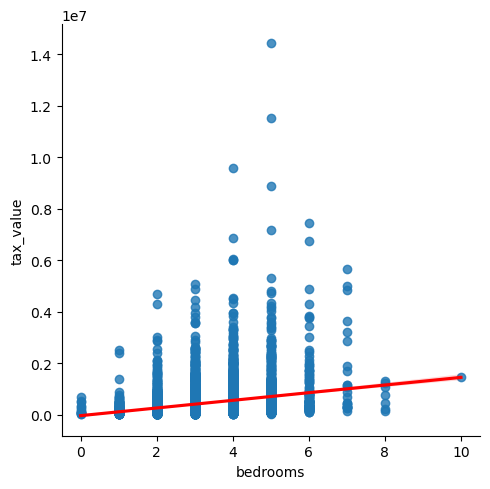

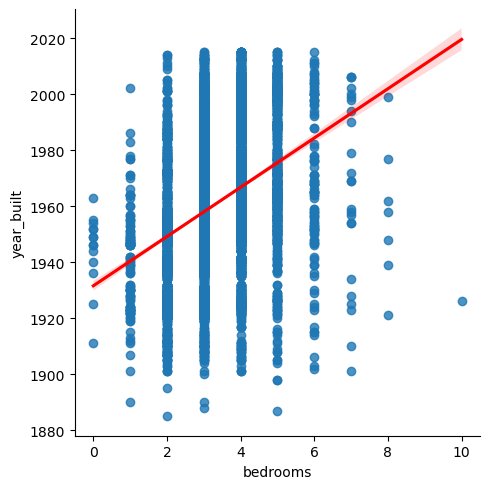

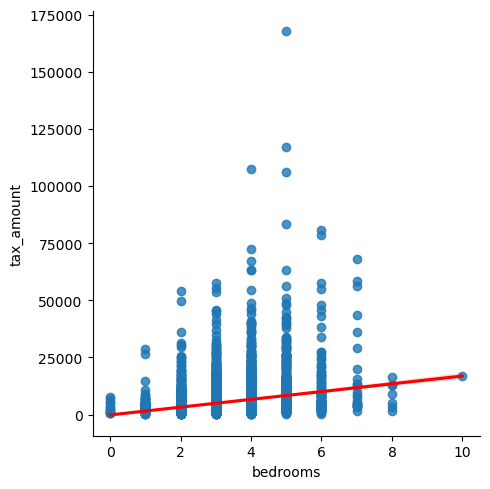

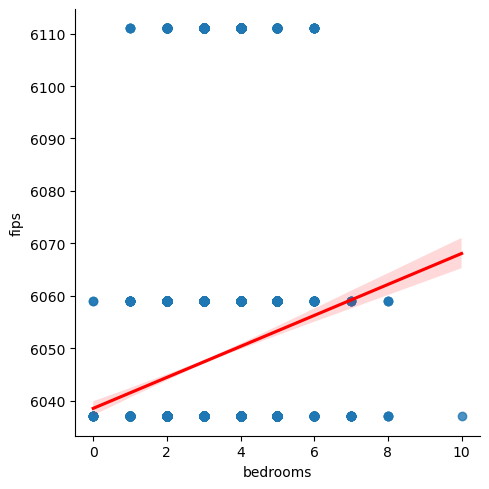

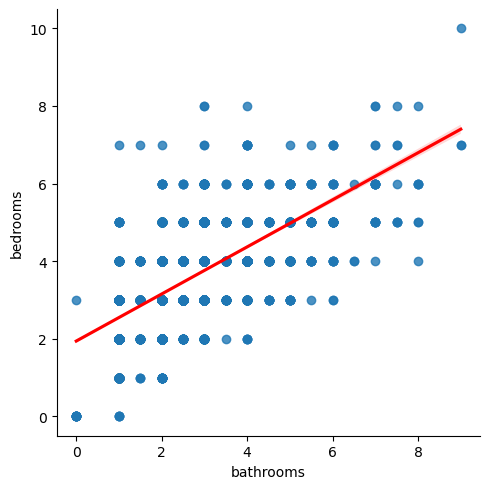

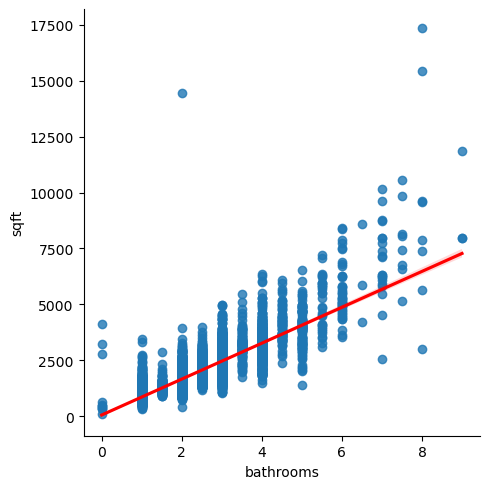

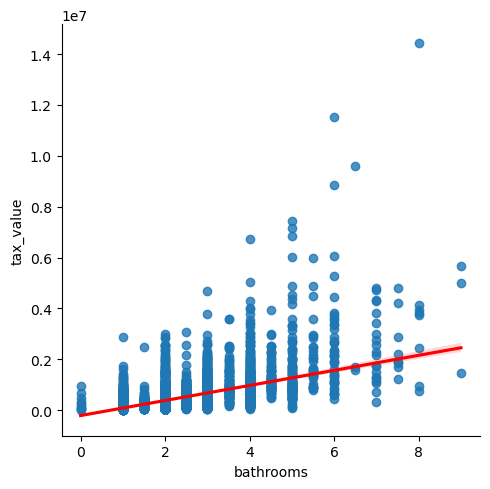

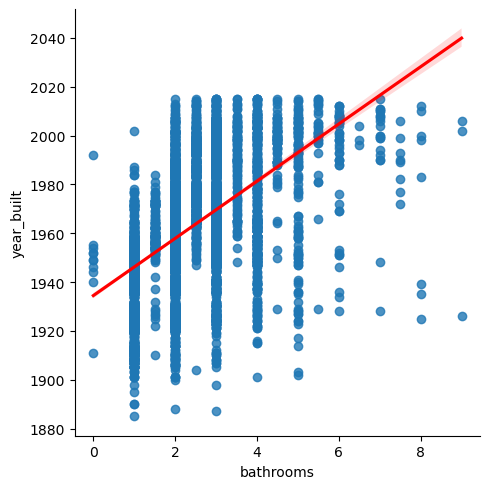

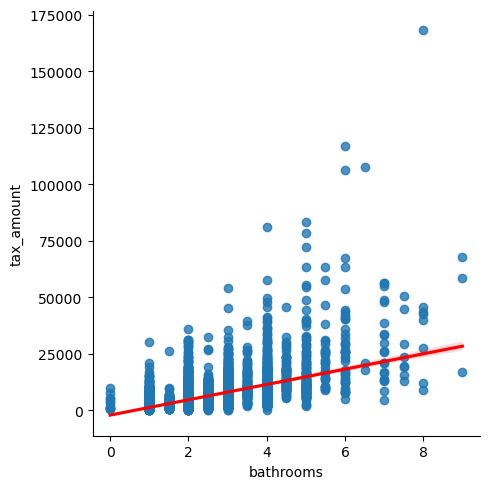

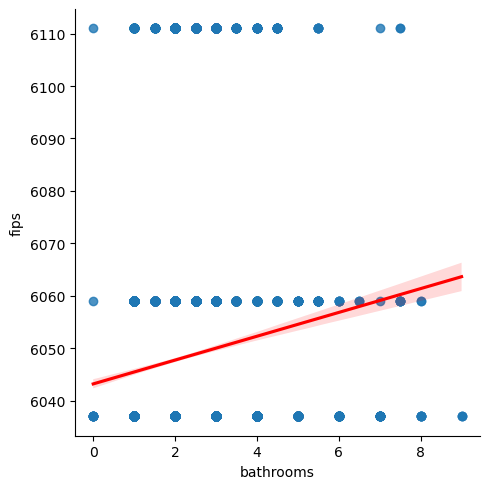

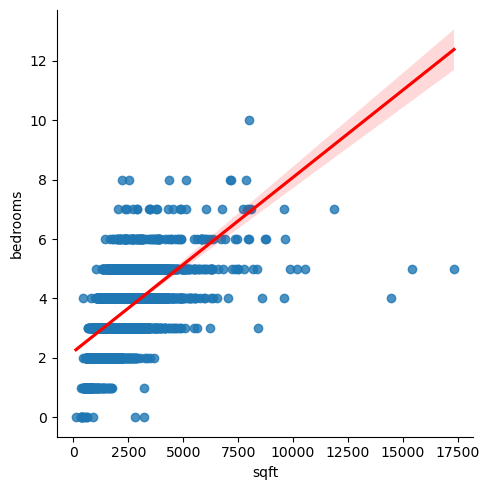

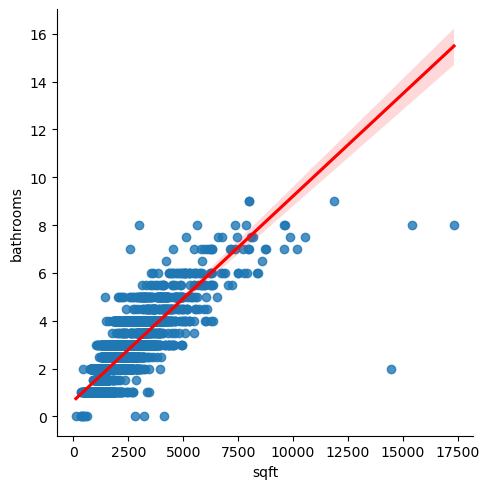

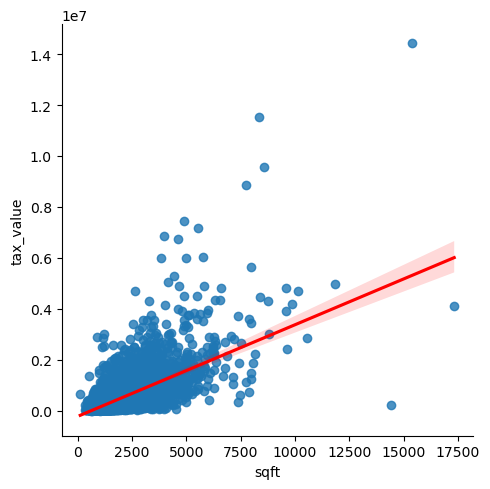

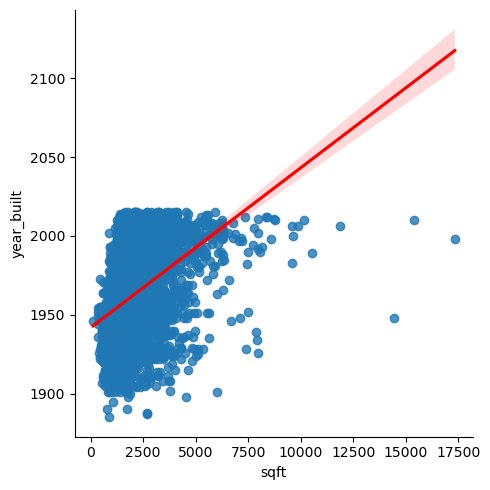

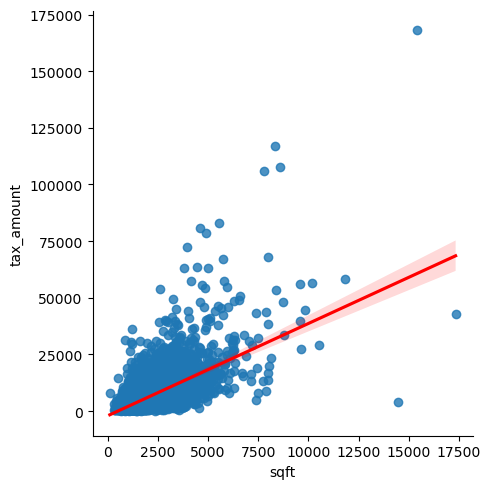

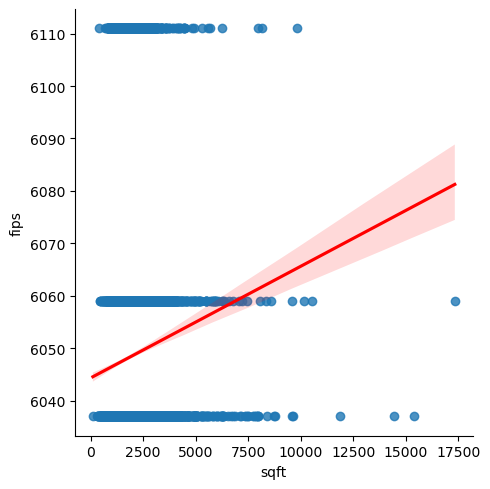

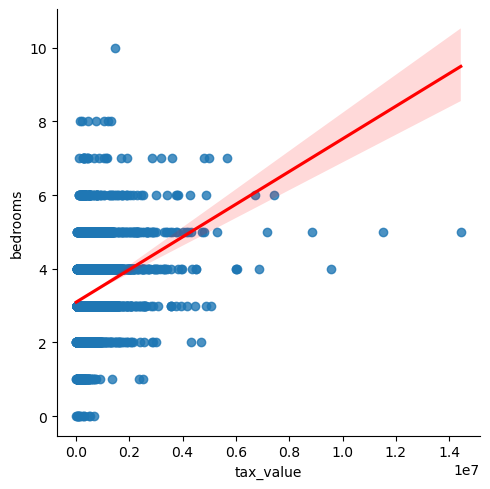

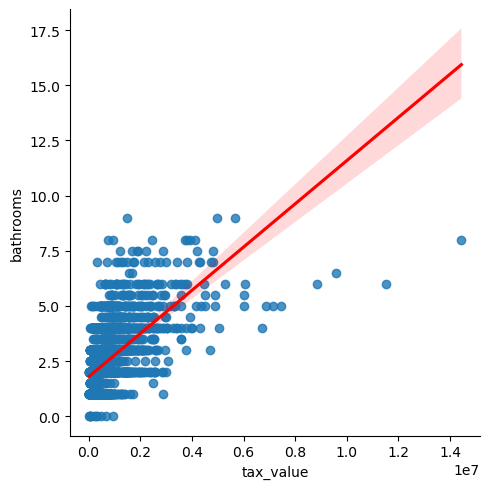

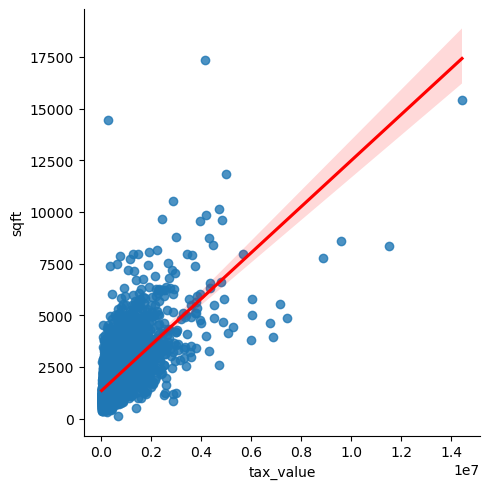

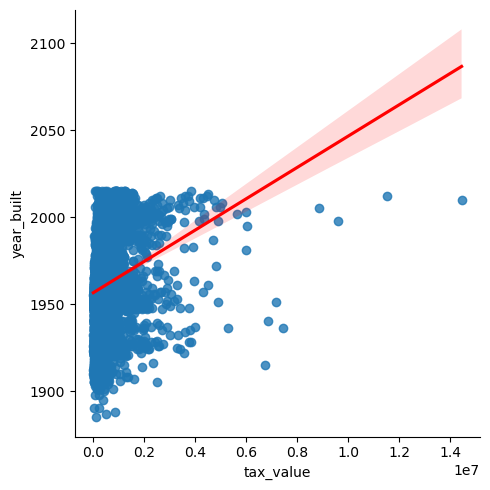

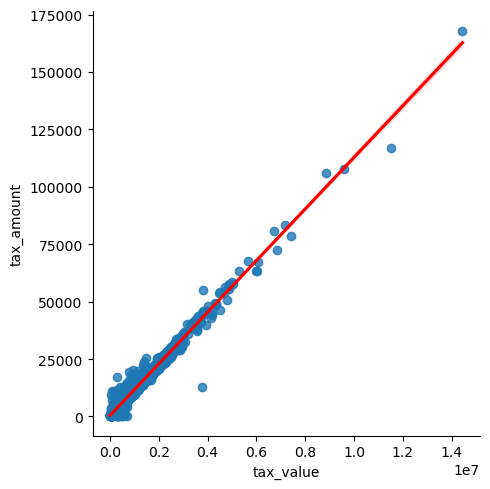

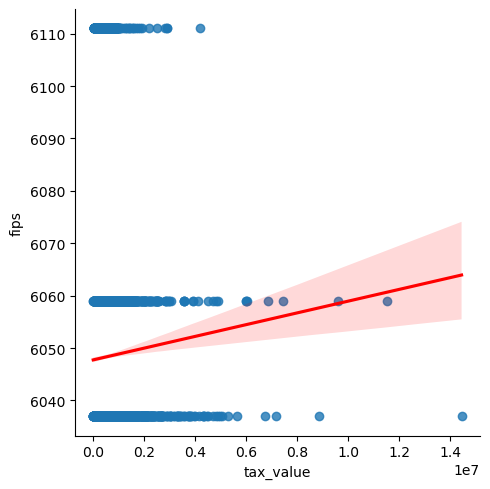

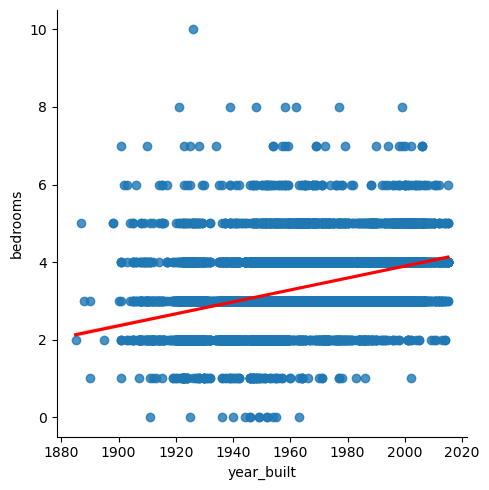

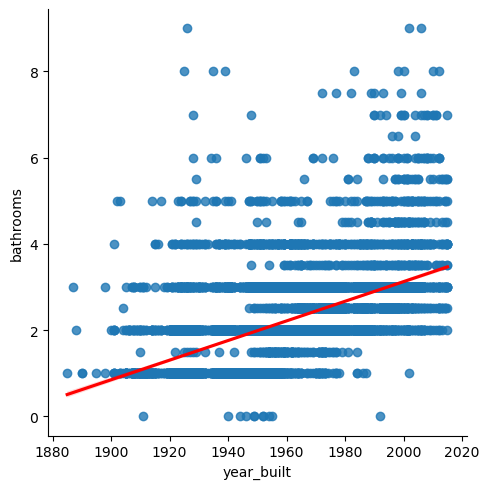

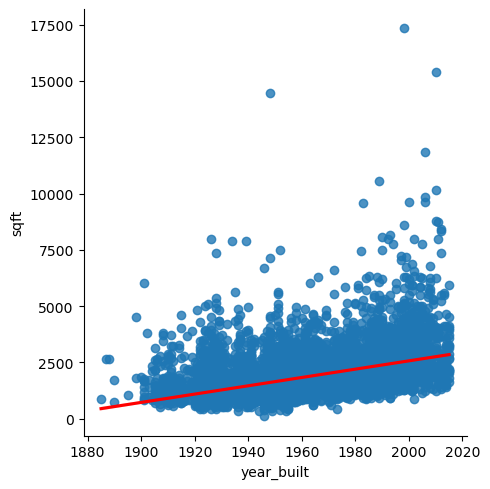

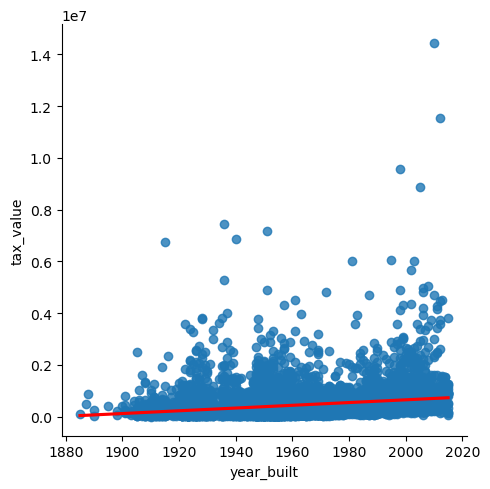

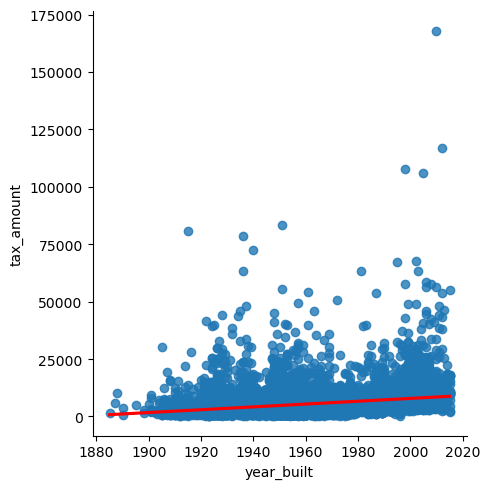

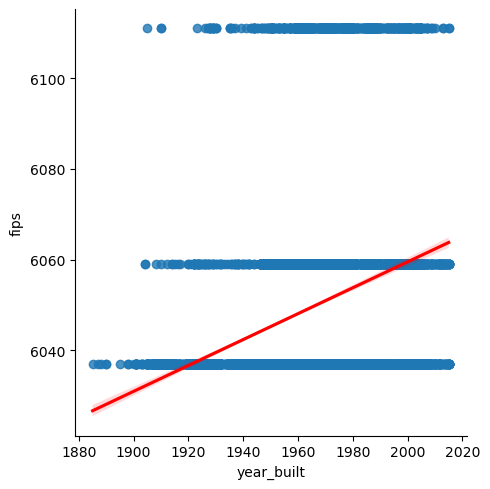

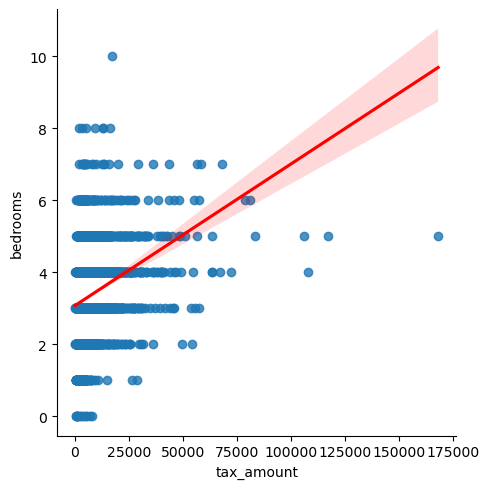

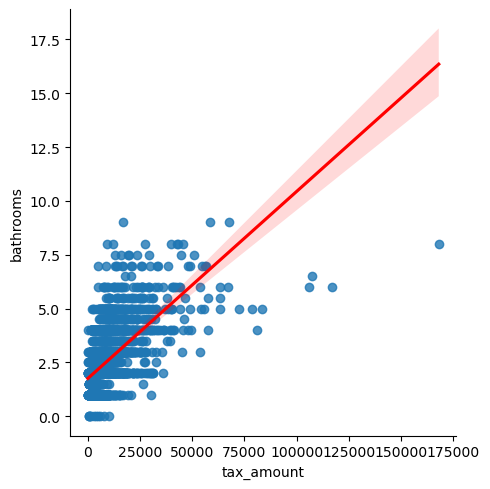

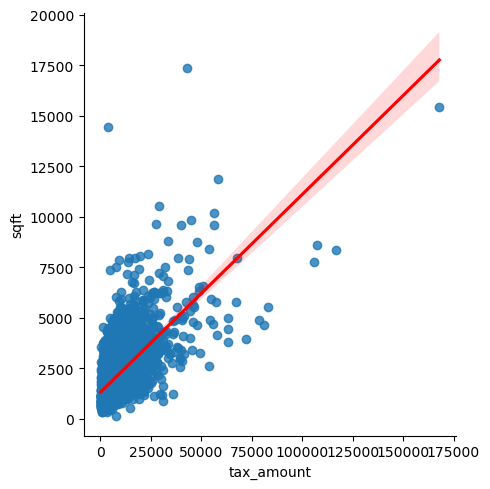

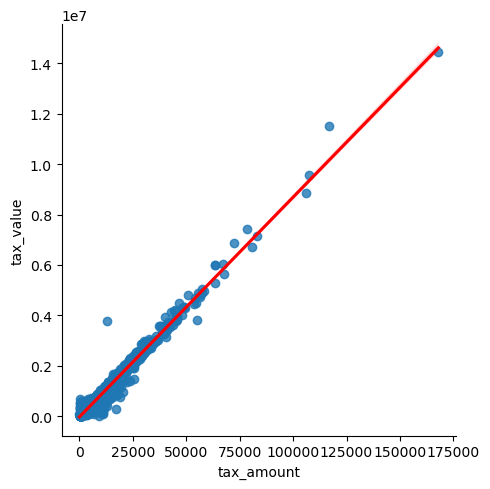

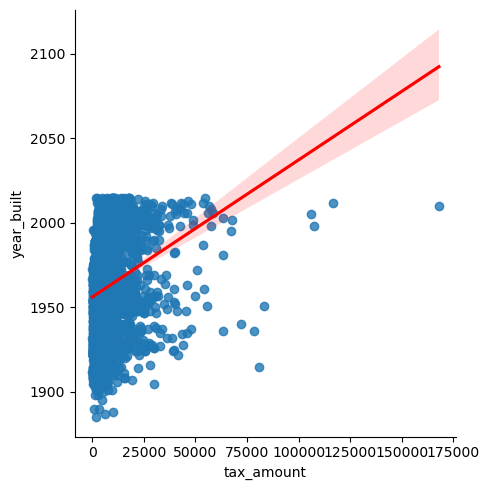

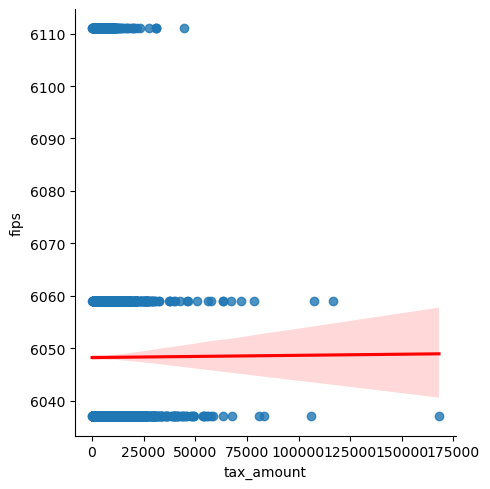

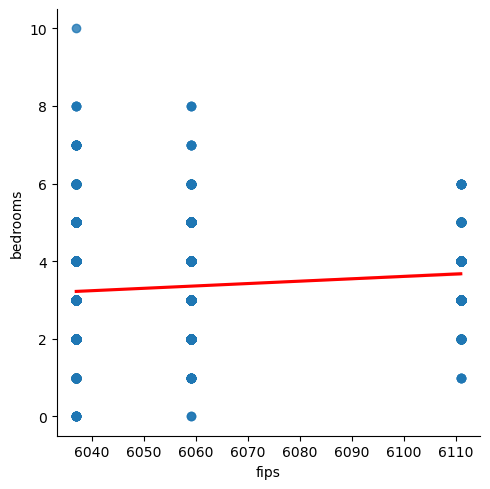

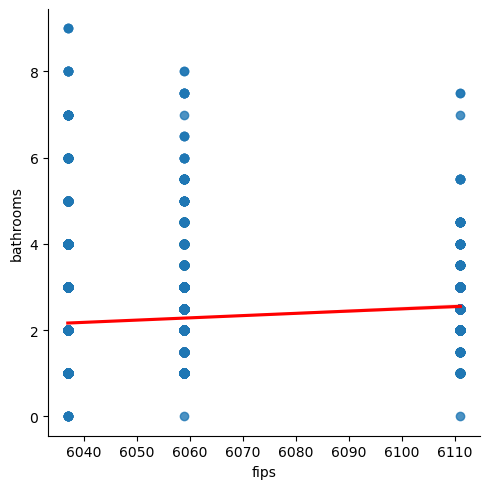

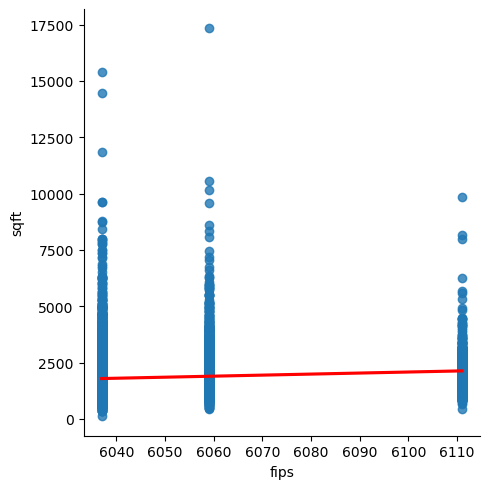

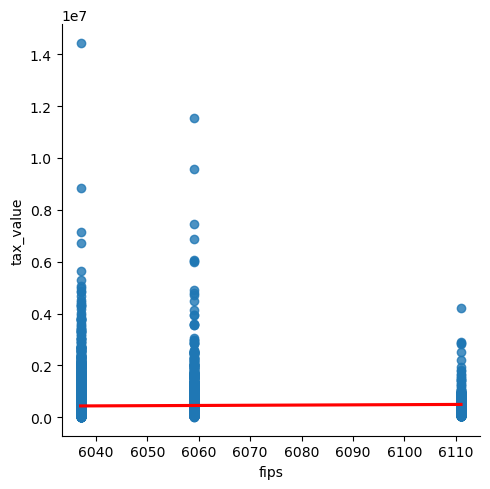

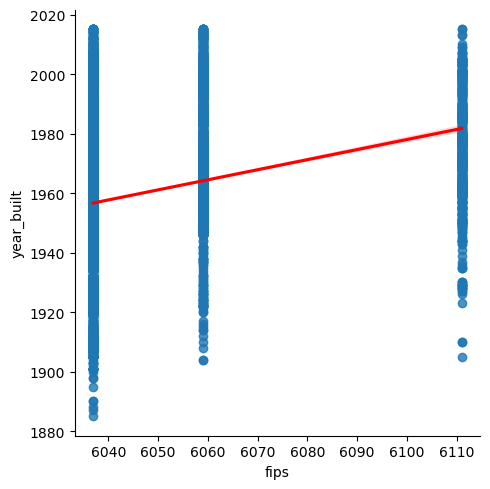

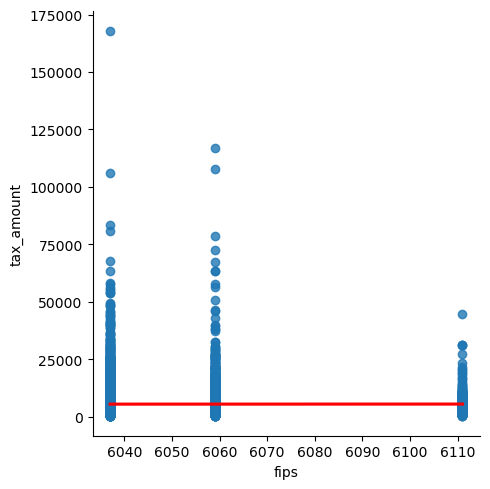

In [6]:
def plot_variable_pairs(df, sample_size=10000):
    
    if sample_size < len(df):
        df_sample = df.sample(n=sample_size, random_state=823)
    else:
        df_sample = df

    
    for col in df.columns:
        for col2 in df.columns:
            if col == col2:
                continue
            else:
                sns.lmplot(x=col, y=col2, data=df_sample, line_kws={'color': 'red'})
                plt.show()
            
plot_variable_pairs(train)

### Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

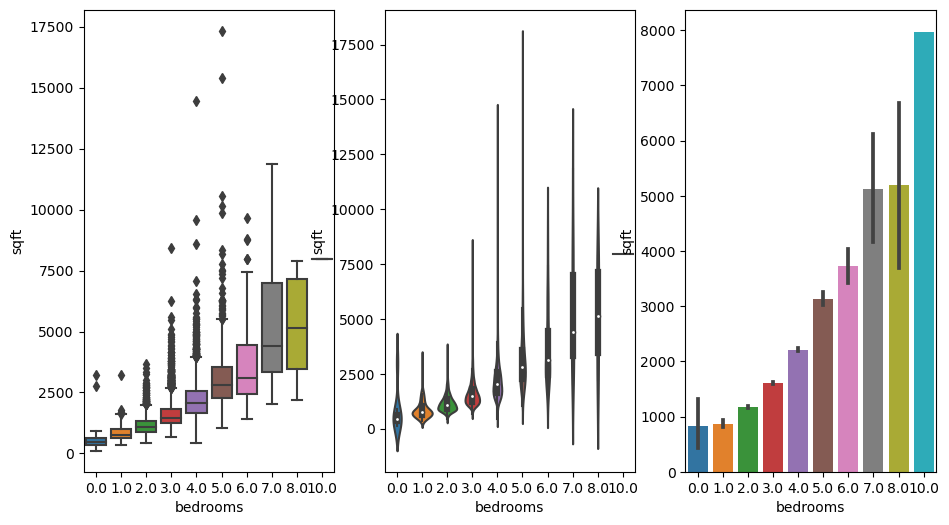

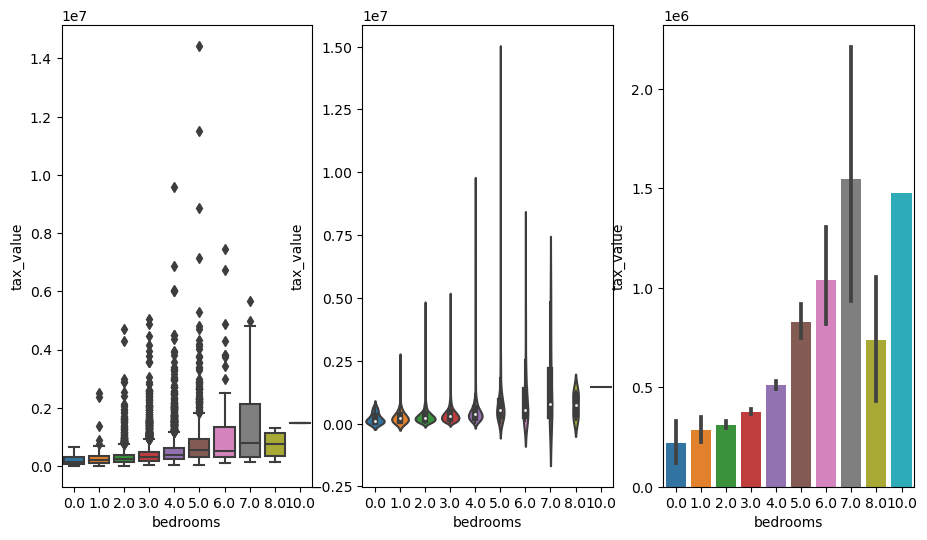

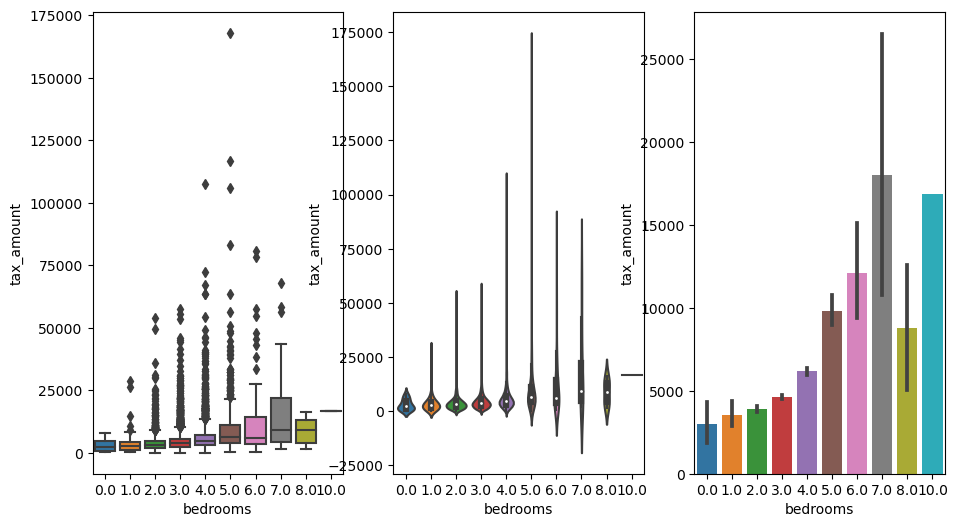

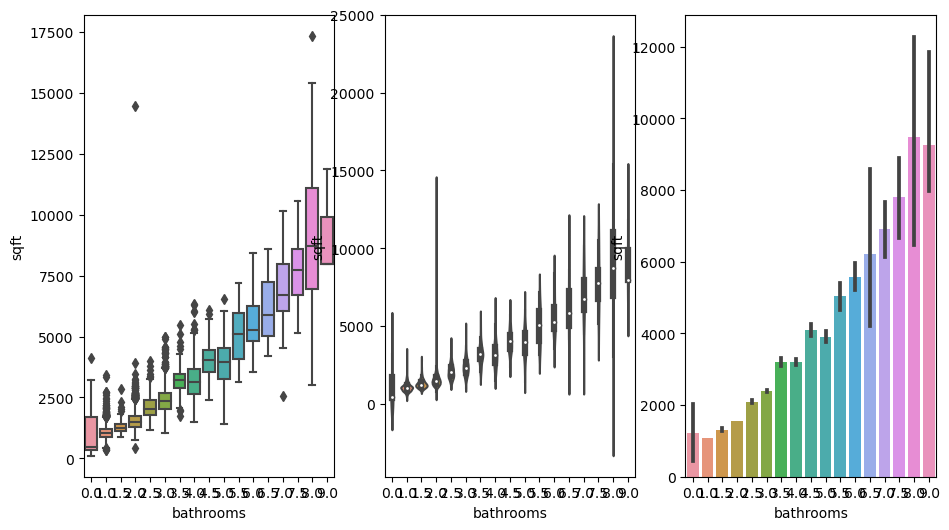

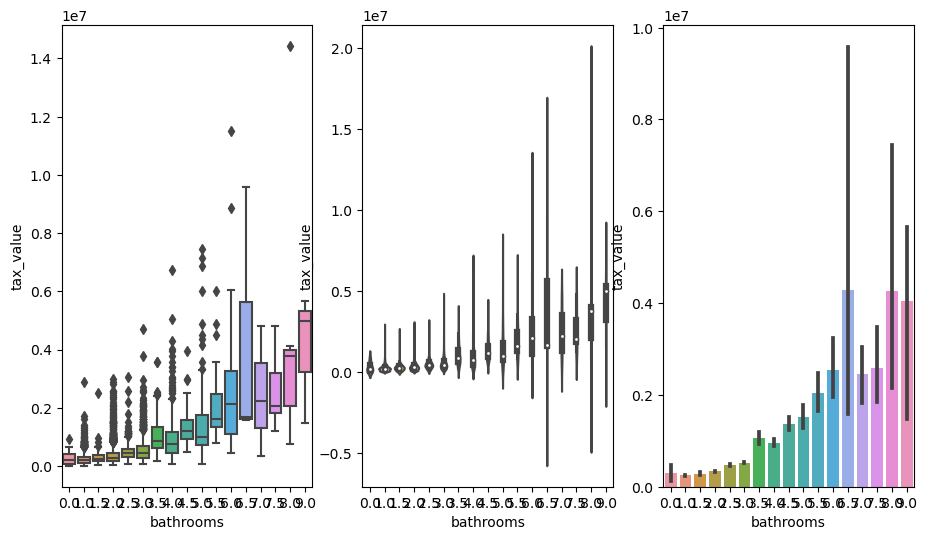

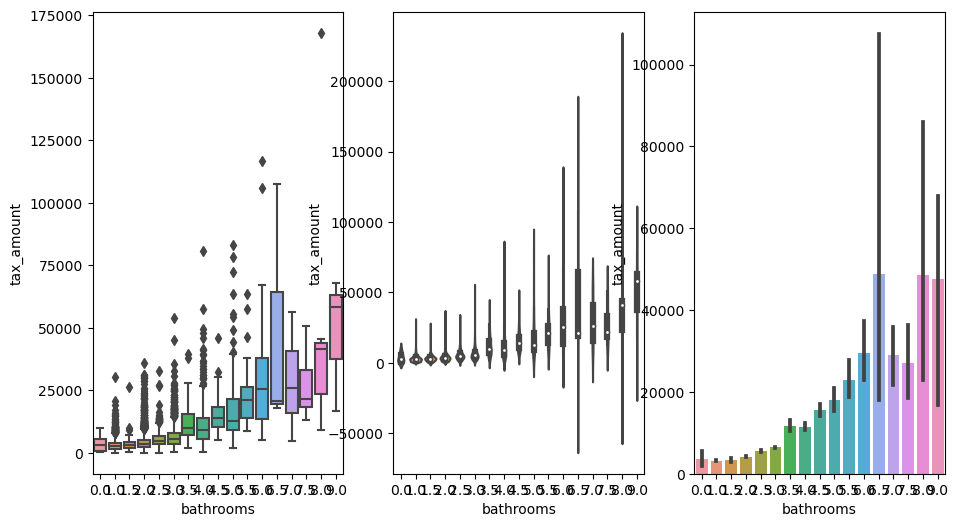

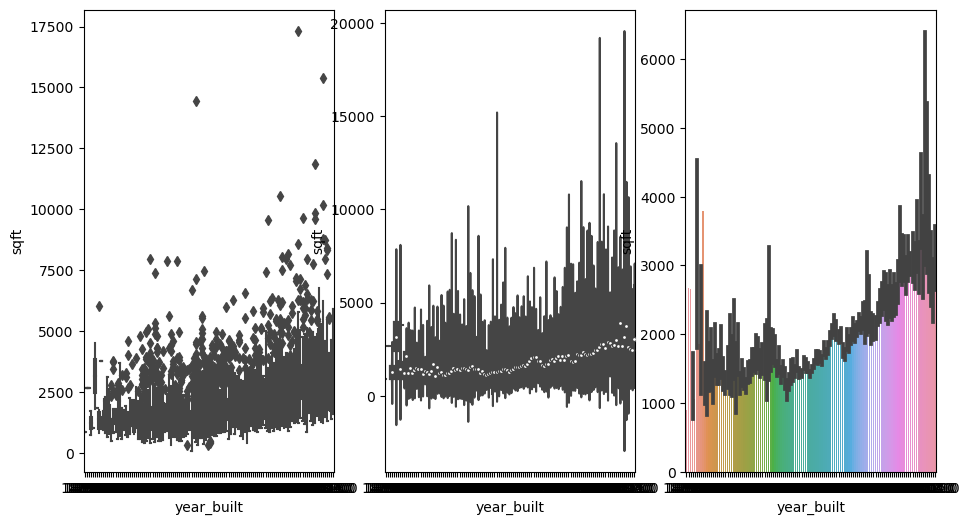

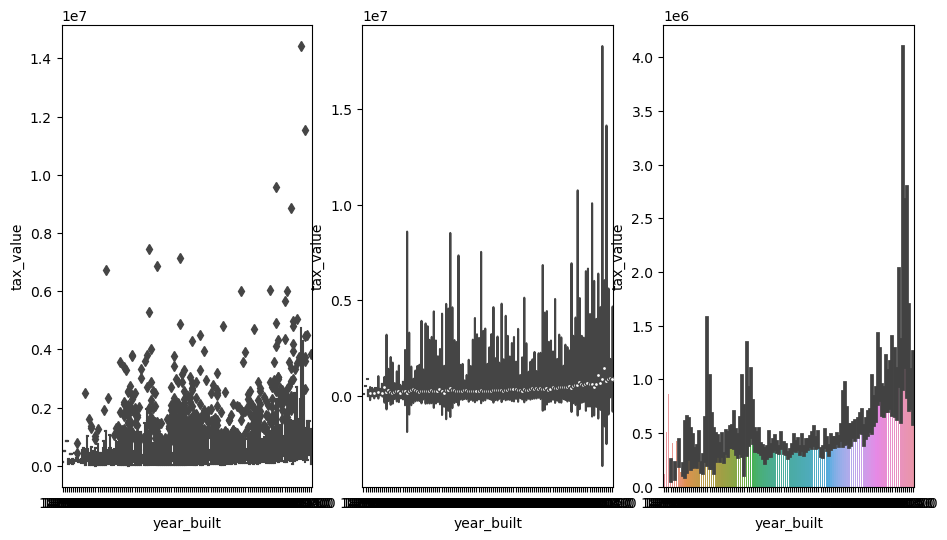

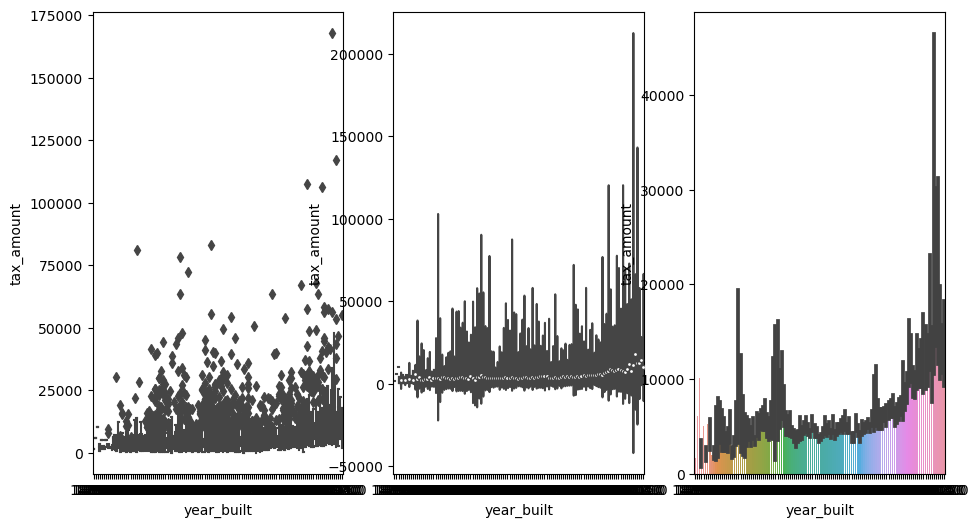

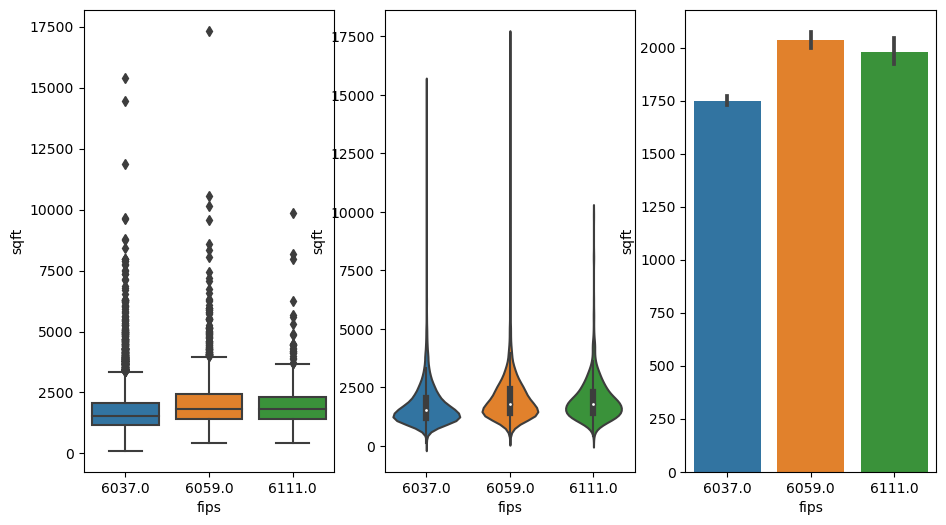

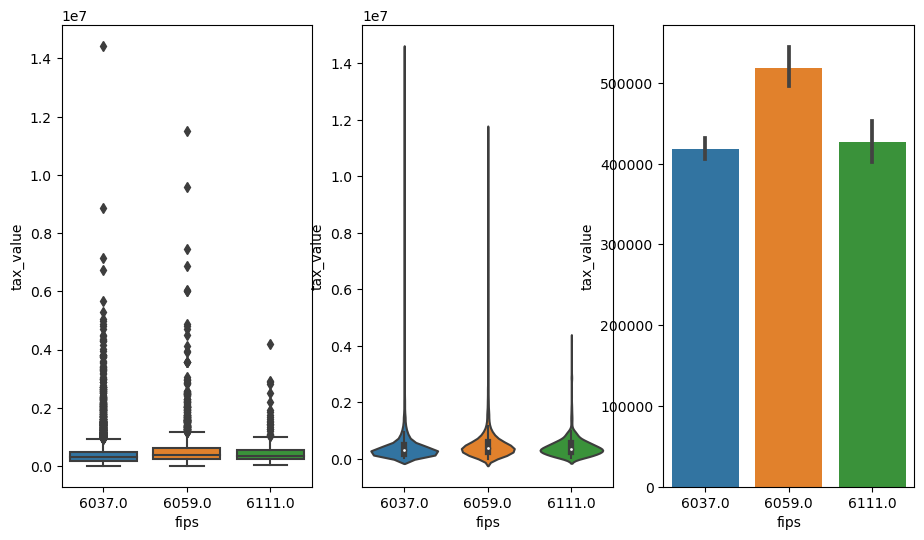

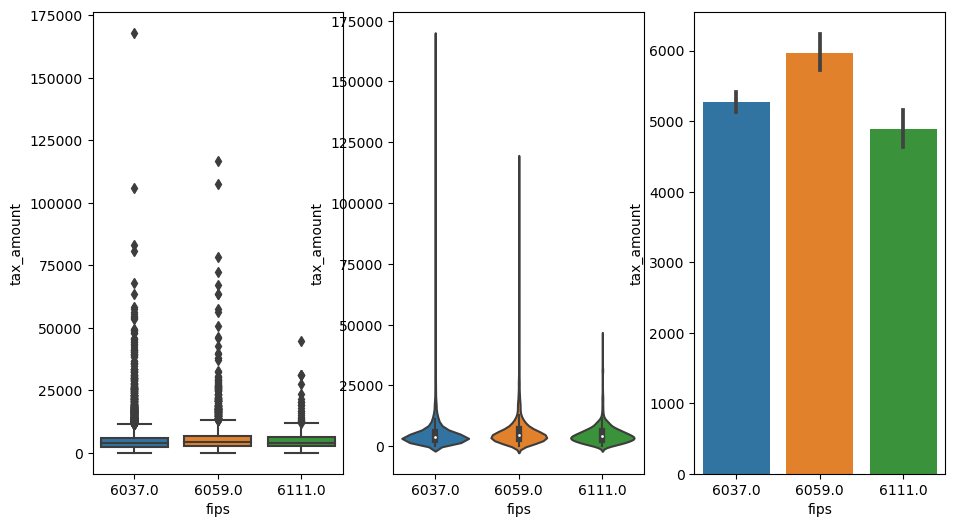

In [7]:
discrete_list = ['bedrooms', 'bathrooms', 'year_built', 'fips']
continuous_list = ['sqft', 'tax_value', 'tax_amount']
def plot_categorical_and_continuous_vars(df, discrete_list, continuous_list, sample_size=10000):# lists of discrete and continuous columns:
    if sample_size < len(df):
        df_sample = df.sample(n=sample_size, random_state=823)
    else:
        df_sample = df
    
    for discrete_col in discrete_list:
        for continuous_col in continuous_list:
            
            plt.figure(figsize=(11,6))
            
            plt.subplot(131)
            sns.boxplot(x=discrete_col, y=continuous_col, data=df_sample)
            plt.subplot(132)
            sns.violinplot(x=discrete_col, y=continuous_col, data=df_sample)
            plt.subplot(133)
            sns.barplot(x=discrete_col, y=continuous_col, data=df_sample)

plot_categorical_and_continuous_vars(train, discrete_list, continuous_list)

### Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

In [ ]:
import explore

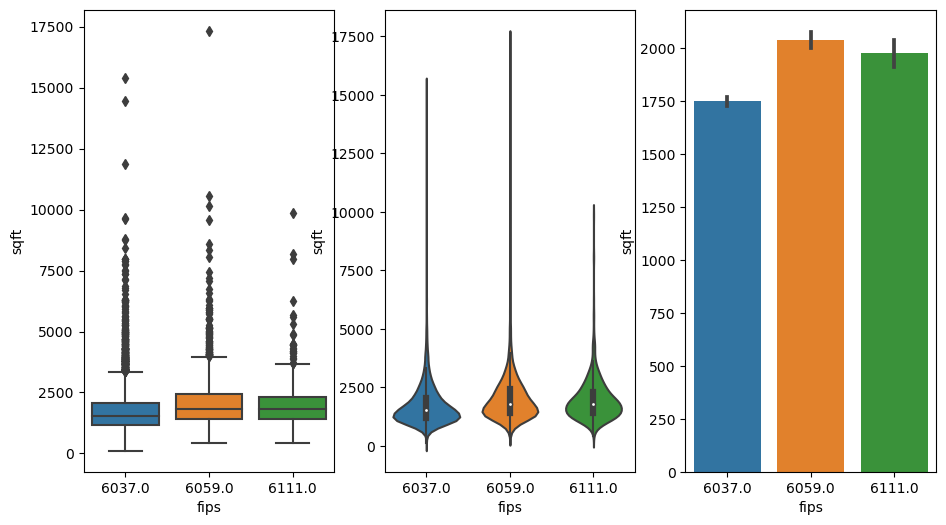

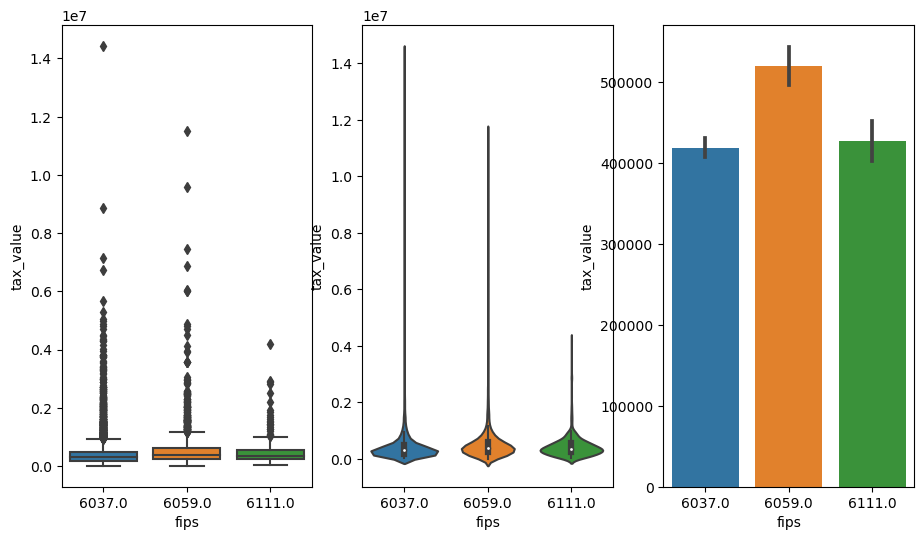

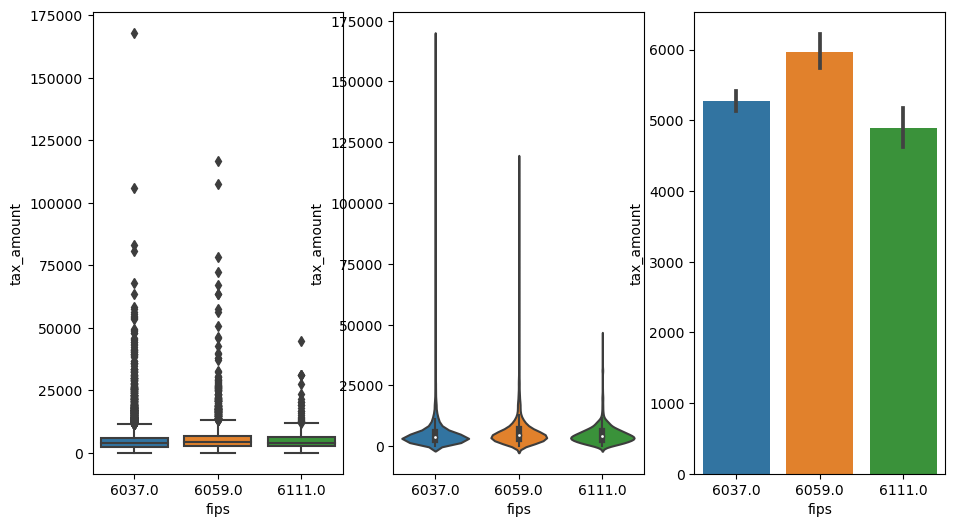

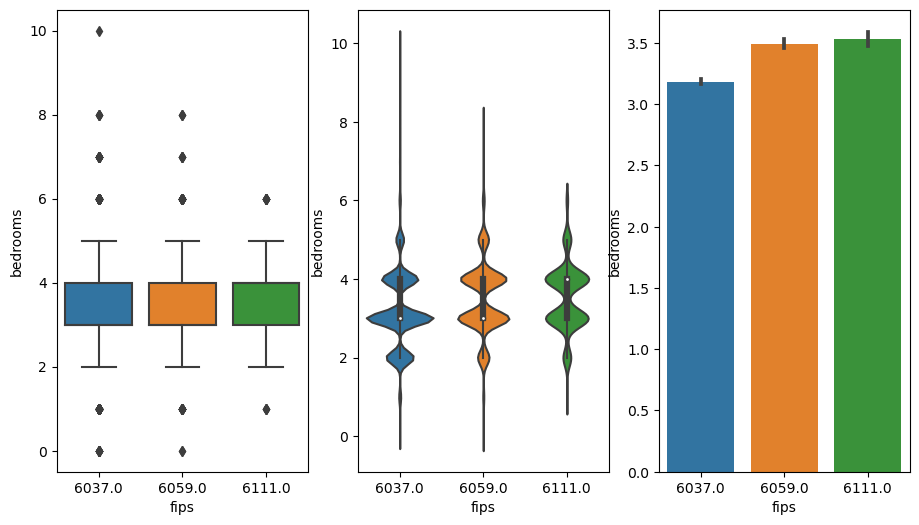

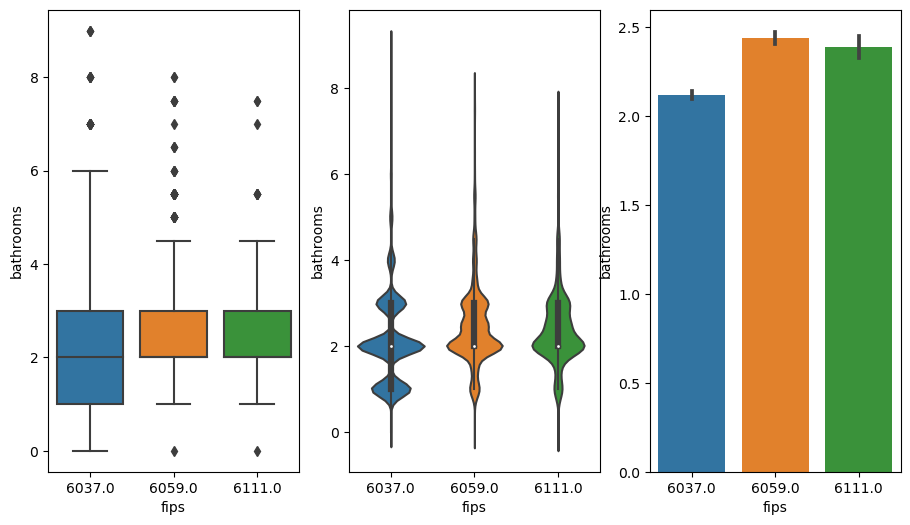

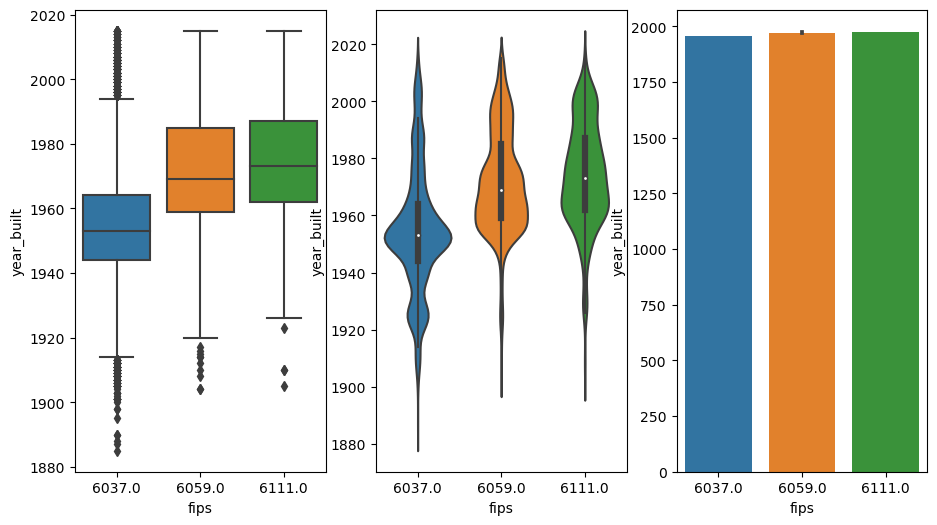

In [10]:
discrete_list = ['fips']
continuous_list = ['sqft', 'tax_value', 'tax_amount', 'bedrooms', 'bathrooms', 'year_built']

explore.plot_categorical_and_continuous_vars(train, discrete_list, continuous_list)

### Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.

In [ ]:
DONE

### Come up with some initial hypotheses based on your goal of predicting property value.

In [ ]:
Bedrooms Bathrooms and square feet are all highly correlated.

### Visualize all combinations of variables in some way.

In [13]:
train.columns

Index(['bedrooms', 'bathrooms', 'sqft', 'tax_value', 'year_built',
       'tax_amount', 'fips'],
      dtype='object')

### Run the appropriate statistical tests where needed.

In [22]:
for col in train.columns:
    for col2 in train.columns:
        if col == col2:
            continue
        else:
            stat, p = stats.pearsonr(train[col], train[col2])
            print(f'{col} and {col2}: {stat}, {p}')

bedrooms and bathrooms: 0.6428199941938816, 0.0
bedrooms and sqft: 0.45757246572026455, 0.0
bedrooms and tax_value: 0.2582352886577043, 0.0
bedrooms and year_built: 0.37709819158003327, 0.0
bedrooms and tax_amount: 0.259558719347058, 0.0
bedrooms and fips: 0.13587721124119026, 0.0
bathrooms and bedrooms: 0.6428199941938816, 0.0
bathrooms and sqft: 0.6303276547361244, 0.0
bathrooms and tax_value: 0.5044756502796601, 0.0
bathrooms and year_built: 0.5099906821230792, 0.0
bathrooms and tax_amount: 0.5052721542127275, 0.0
bathrooms and fips: 0.09811728269882936, 0.0
sqft and bedrooms: 0.45757246572026455, 0.0
sqft and bathrooms: 0.6303276547361244, 0.0
sqft and tax_value: 0.46261300382875103, 0.0
sqft and year_built: 0.33220351686837507, 0.0
sqft and tax_amount: 0.4612281073264569, 0.0
sqft and fips: 0.07375866347898588, 0.0
tax_value and bedrooms: 0.2582352886577043, 0.0
tax_value and bathrooms: 0.5044756502796601, 0.0
tax_value and sqft: 0.46261300382875103, 0.0
tax_value and year_built: 

In [24]:
house_corr = train.corr()
house_corr

,bedrooms,bathrooms,sqft,tax_value,year_built,tax_amount,fips
bedrooms,1.000000,0.642820,0.457572,0.258235,0.377098,0.259559,0.135877
bathrooms,0.642820,1.000000,0.630328,0.504476,0.509991,0.505272,0.098117
sqft,0.457572,0.630328,1.000000,0.462613,0.332204,0.461228,0.073759
tax_value,0.258235,0.504476,0.462613,1.000000,0.192784,0.990910,0.018889
year_built,0.377098,0.509991,0.332204,0.192784,1.000000,0.194788,0.300458
tax_amount,0.259559,0.505272,0.461228,0.990910,0.194788,1.000000,-0.004684
fips,0.135877,0.098117,0.073759,0.018889,0.300458,-0.004684,1.000000


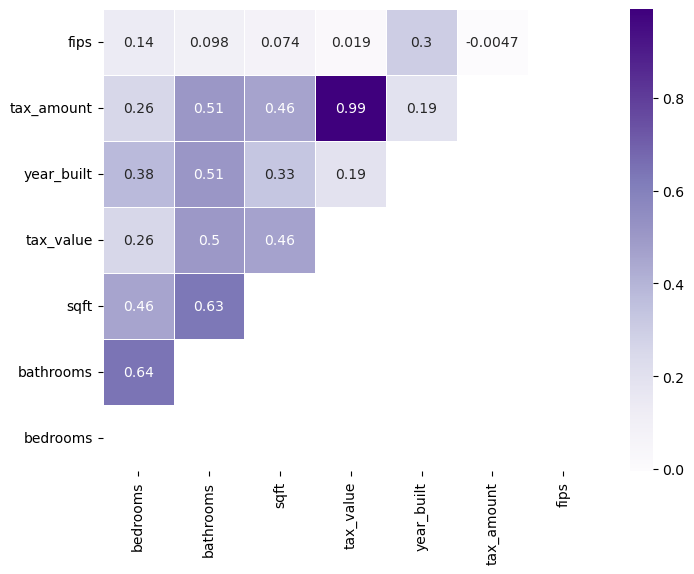

In [28]:
plt.figure(figsize=(8,6))
sns.heatmap(house_corr, cmap='Purples', annot=True, linewidth=0.5, mask= np.triu(house_corr))
plt.ylim(0, 7)

plt.show()

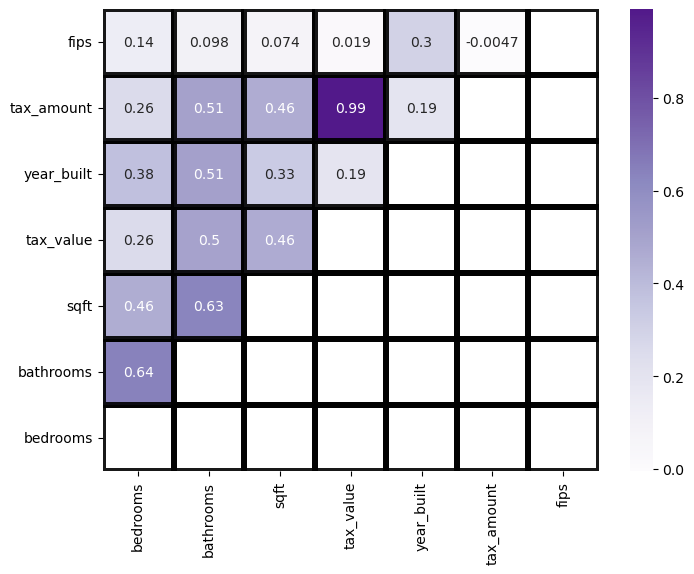

In [29]:
# Pass my correlation matrix to Seaborn's heatmap.

kwargs = {'alpha':.9,'linewidth':3, 'linestyle':'-', 
          'linecolor':'k','rasterized':False, 'edgecolor':'w', 
          'capstyle':'projecting',}

plt.figure(figsize=(8,6))
sns.heatmap(house_corr, cmap='Purples', annot=True, mask= np.triu(house_corr), **kwargs)
plt.ylim(0, 7)

plt.show()


### What independent variables are correlated with the dependent variable, home value?

bathrooms and square feet as well as tax_value

### Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?

fips is correlated with none
year built is correlated with bathrooms
tax value is correlated with bathrooms and square feet as well as with bedrooms

from the loops above all the p values are extremely low

### Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.

as expected the county that is involved is not really correlated with any of the other features except having a light correlation with year built.  This makes sense as Los Angele, Orange and Ventura Counties were all built out and expanded at different times with Los Angeles being as shown above 20 years before the other two on average.

Year built is suprisingly correlated with bathrooms
tax value is correlated with bathrooms square feet and bedrooms

### Explore your dataset with any other visualizations you think will be helpful.